In [1]:
import sys
sys.path.insert(0, '/dfm1/lijli06/DFM_SPARK/src')

import importlib

from Util.Util import launch_spark

%matplotlib inline

# Test Metrics

In [2]:
from Metrics import Metrics
importlib.reload(Metrics)

<module 'Metrics.Metrics' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/Metrics.py'>

In [3]:
spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

Launched Spark Session: spark_20181019215445


In [4]:
mt = Metrics.Metrics(start_date="2018-09-20", end_date="2018-09-25", log='sysauditlog')

In [5]:
mt.load_data(spark, orgs=['*'], target_fields=['ORGNAME', 'FIBIN'])

(DataFrame[ORGNAME: string, FIBIN: string, DATELOGGED: string, DATE: date],
 None)

In [6]:
# spark.stop()

# Test Normalizer

In [7]:
from Normalizer import Normalizer

In [8]:
nm = Normalizer('/dfm1/lijli06/DFM_SPARK/ServicePackTest.json')
nm.parse_job_config()

[{'TemporalDist': {'target_fields': ['ISSUERCOUNTRY'],
   'weight': 'AMOUNTUSD',
   'weight_method': 'mean',
   'filters': ["CURR_CODE != '' and BASE_CURR_CODE != '' and CURR_CODE = BASE_CURR_CODE",
    'AMOUNTUSD > 0 and AMOUNTUSD <= 40000'],
   'reports': ["add_table(title='Mean Amt Dome MCur By IsC', description=[])"],
   'start_date': '2018-07-01',
   'end_date': '2018-07-31',
   'date_interval': 1,
   'date_unit': 'days',
   'log': 'sysauditlog',
   'group': ['./jobs/HSBC_Group.txt'],
   'group_type': 'file',
   'force_update': False,
   'is_dedup': False}}]

# Testing TemporalDist

In [9]:
from Metrics import TemporalDist, Metrics
importlib.reload(TemporalDist)
importlib.reload(Metrics)

<module 'Metrics.Metrics' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/Metrics.py'>

In [10]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [11]:
td = TemporalDist.TemporalDist(start_date='2017-12-01', 
                               end_date='2017-12-31',
                               target_fields=['ISSUERCOUNTRY'],
                               date_interval=1, 
                               date_unit='weeks',
                               group_type='file',
                               group=['/dfm1/lijli06/DFM_SPARK/jobs/*.txt'],
                               weight='AMOUNTUSD'
                               )

In [12]:
td.run(spark)

In [13]:
td.result

ISSUERCOUNTRY,Week of Year,Bahrain,Bermuda,Canada,Egypt,Hong Kong,Malta,Oman,Qatar,United Arab Emirates,United Kingdom
0,2017-12-01,2423,715,5214,13242,104088,7753,4323,9132,61147,3790481
1,2017-12-08,2187,691,5483,12428,161161,8273,4405,8990,58976,3758532
2,2017-12-15,1889,621,5796,12138,109820,7826,4892,7676,56968,3594022
3,2017-12-22,2062,378,5540,12759,98470,7231,5082,8187,50226,2640797
4,2017-12-29,943,195,2381,5196,41557,2766,1882,2683,20032,1261935


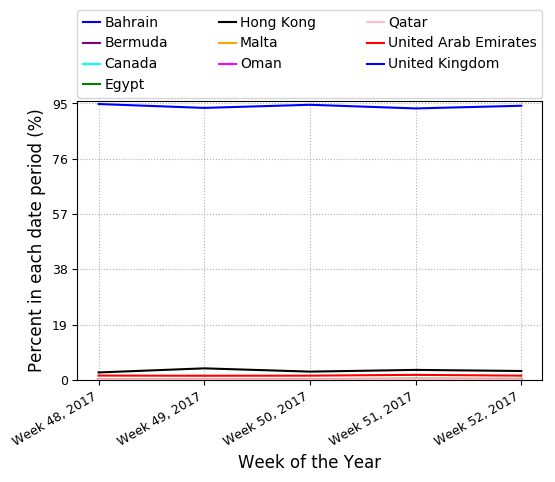

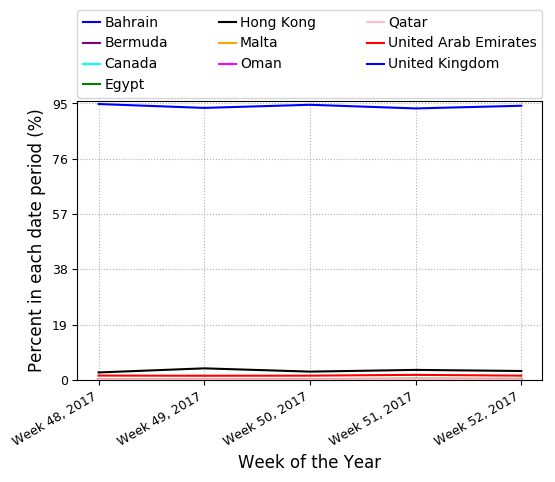

In [14]:
td.add_line_plot(plotGrpPercent=True, show=True)

In [15]:
td.addonResult

In [16]:
table1, table2 = td.add_table(extraCol=True, show=True)
table1

ISSUERCOUNTRY,Week of Year,Bahrain,Bermuda,Canada,Egypt,Hong Kong,Malta,Oman,Qatar,United Arab Emirates,United Kingdom,Total,Percent,Cumulative,Cum_Pct
0,"Week 48, 2017","2,423",715,"5,214","13,242","104,088","7,753","4,323","9,132","61,147","3,790,481","3,998,518",25.00,"3,998,518",25.00
1,"Week 49, 2017","2,187",691,"5,483","12,428","161,161","8,273","4,405","8,990","58,976","3,758,532","4,021,126",25.15,"8,019,644",50.15
2,"Week 50, 2017","1,889",621,"5,796","12,138","109,820","7,826","4,892","7,676","56,968","3,594,022","3,801,648",23.77,"11,821,292",73.92
3,"Week 51, 2017","2,062",378,"5,540","12,759","98,470","7,231","5,082","8,187","50,226","2,640,797","2,830,732",17.70,"14,652,024",91.62
4,"Week 52, 2017",943,195,"2,381","5,196","41,557","2,766","1,882","2,683","20,032","1,261,935","1,339,570",8.38,"15,991,594",100.00


In [17]:
# spark.stop()

# Testing ScoreDist

In [18]:
from Metrics import ScoreDist
importlib.reload(ScoreDist)

<module 'Metrics.ScoreDist' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/ScoreDist.py'>

In [19]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [20]:
sd = ScoreDist.ScoreDist(start_date='2018-05-01', 
                               end_date='2018-05-03', 
                               date_interval=1, 
                               date_unit='all', 
                               group=['*'],
                               bins=[0, 1001, 50],
                               card_max=True
                               )

In [21]:
sd.run(spark)

In [22]:
sd.result

,Bin lower bound,Count,Percent,Cumulative,Cum_Pct,PctLeft
0,1000,0,0.000000,0,0.000000,100.000000
1,950,2,0.210305,2,0.210305,99.789695
2,900,1,0.105152,3,0.315457,99.684543
3,850,3,0.315457,6,0.630915,99.369085
4,800,3,0.315457,9,0.946372,99.053628
5,750,5,0.525762,14,1.472135,98.527865
6,700,7,0.736067,21,2.208202,97.791798
7,650,10,1.051525,31,3.259727,96.740273
8,600,9,0.946372,40,4.206099,95.793901
9,550,12,1.261830,52,5.467928,94.532072


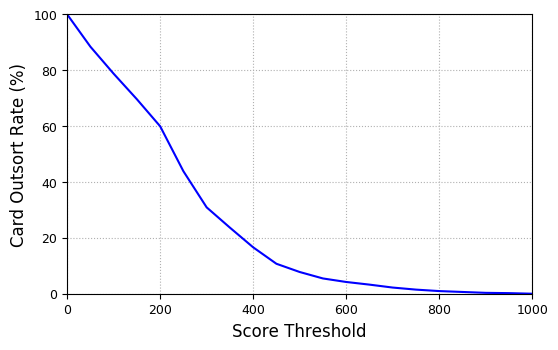

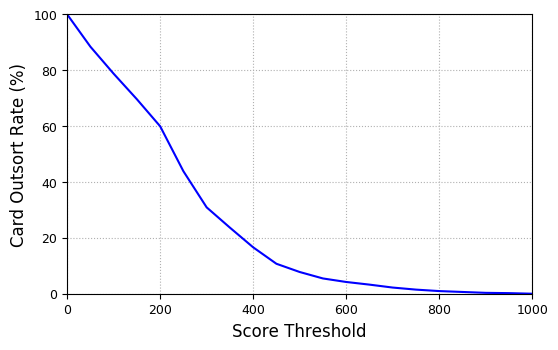

In [23]:
sd.add_plot(show=True)

In [24]:
sd.add_table(show=True)

,Bin lower bound,Count,Percent,Cumulative,Cum_Pct,PctLeft
0,1000,0,0.00%,0,0.00%,100.00%
1,950,2,0.21%,2,0.21%,99.79%
2,900,1,0.11%,3,0.32%,99.68%
3,850,3,0.32%,6,0.63%,99.37%
4,800,3,0.32%,9,0.95%,99.05%
5,750,5,0.53%,14,1.47%,98.53%
6,700,7,0.74%,21,2.21%,97.79%
7,650,10,1.05%,31,3.26%,96.74%
8,600,9,0.95%,40,4.21%,95.79%
9,550,12,1.26%,52,5.47%,94.53%


In [25]:
# spark.stop()

# Testing AmountDist

In [26]:
from Metrics import AmountDist, Metrics
importlib.reload(AmountDist)
importlib.reload(Metrics)

<module 'Metrics.Metrics' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/Metrics.py'>

In [27]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [28]:
ad = AmountDist.AmountDist(start_date='2018-05-01', 
                               end_date='2018-05-06', 
                               date_interval=1, 
                               date_unit='weeks', 
                               group=['*']
                               )

In [29]:
ad.run(spark)

In [30]:
ad.result

,Amount Bin,"Week 18, 2018"
0,-inf,73
1,1.000000e-01,6
2,1.800000e-01,2
3,3.200000e-01,0
4,5.600000e-01,7
5,1.000000e+00,19
6,1.780000e+00,25
7,3.160000e+00,41
8,5.620000e+00,96
9,1.000000e+01,169


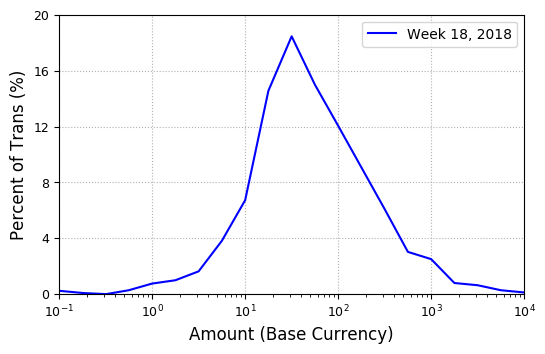

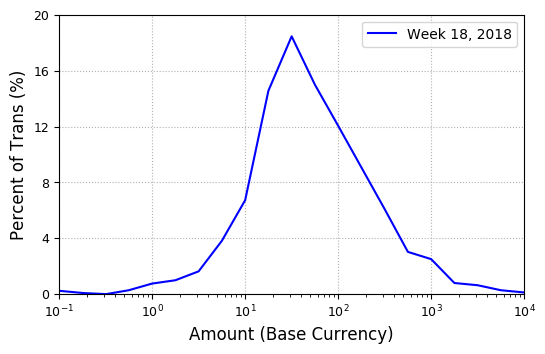

In [31]:
ad.add_plot(show=True)

In [32]:
ad.add_table(show=True)

,Amount Bin,"Week 18, 2018"
0,-inf,73
1,0.10,6
2,0.18,2
3,0.32,0
4,0.56,7
5,1.00,19
6,1.78,25
7,3.16,41
8,5.62,96
9,10.00,169


In [33]:
# spark.stop()

# Testing BaseCurrDist

In [34]:
from Metrics import BaseCurrDist, Metrics
importlib.reload(BaseCurrDist)
importlib.reload(Metrics)

<module 'Metrics.Metrics' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/Metrics.py'>

In [35]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [36]:
bd = BaseCurrDist.BaseCurrDist(start_date='2018-05-07', 
                               end_date='2018-05-15', 
                               date_interval=1, 
                               date_unit='all', 
                               group=['*', '*']
                               )

In [37]:
bd.run(spark)

In [38]:
bd.result

,Value,Count,Percent,Cumulative,Cum_Pct
0,826,1971661,99.999949,1971661,99.999949
1,,1,0.000051,1971662,100.000000


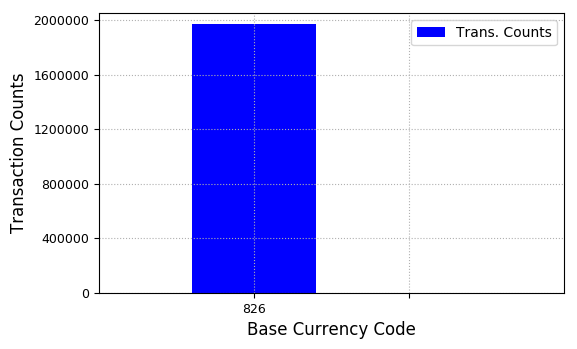

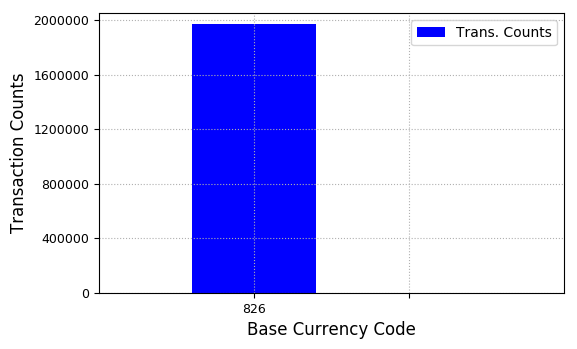

In [39]:
bd.add_plot(show=True)

In [40]:
bd.add_table(show=True)

,Value,Count,Percent,Cumulative,Cum_Pct
0,826,"1,971,661",100.00%,"1,971,661",100.00%
1,,1,0.00%,"1,971,662",100.00%


In [41]:
# spark.stop()

# Testing ErrorDist

In [42]:
from Metrics import ErrorDist, Metrics
importlib.reload(ErrorDist)
importlib.reload(Metrics)

<module 'Metrics.Metrics' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/Metrics.py'>

In [43]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [44]:
ed = ErrorDist.ErrorDist(start_date='2018-05-02', 
                               end_date='2018-05-06', 
                               date_interval=1, 
                               date_unit='days', 
                               group=['*']
                               )

In [45]:
ed.run(spark)

In [46]:
ed.result

,Value,2018-05-02,2018-05-03,2018-05-04,2018-05-05,2018-05-06


In [47]:
ed.add_table(show=True)

,Value,2018-05-02,2018-05-03,2018-05-04,2018-05-05,2018-05-06


In [48]:
# spark.stop()

# Testing TxnPerCardDist

In [49]:
from Metrics import TxnPerCardDist, Metrics
importlib.reload(TxnPerCardDist)
importlib.reload(Metrics)

<module 'Metrics.Metrics' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/Metrics.py'>

In [50]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [51]:
tcd = TxnPerCardDist.TxnPerCardDist(start_date='2018-05-01', 
                               end_date='2018-05-06', 
                               date_interval=1, 
                               date_unit='all', 
                               group=['*']
                               )

In [52]:
tcd.run(spark)

In [53]:
tcd.result

,No. Trans.,Count,Percent,Cumulative,Cum_Pct,PctLeft
0,1,1198,71.351995,1198,71.351995,28.648005
1,2,333,19.833234,1531,91.185229,8.814771
2,3,87,5.181656,1618,96.366885,3.633115
3,4,33,1.965456,1651,98.332341,1.667659
4,5,9,0.536033,1660,98.868374,1.131626
5,6,4,0.238237,1664,99.106611,0.893389
6,7,3,0.178678,1667,99.285289,0.714711
7,8,3,0.178678,1670,99.463967,0.536033
8,9,1,0.059559,1671,99.523526,0.476474
9,10,2,0.119119,1673,99.642644,0.357356


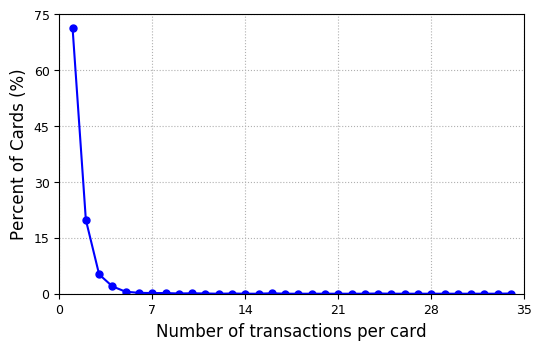

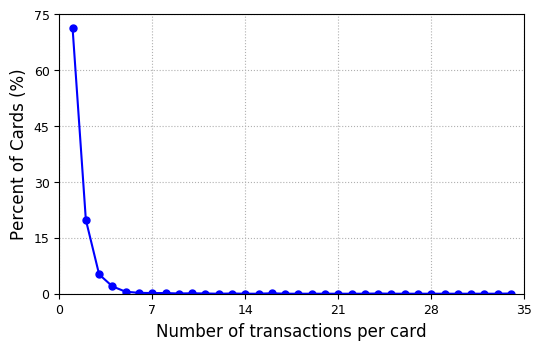

In [54]:
tcd.add_plot(show=True)

In [55]:
tcd.add_table(show=True)

,No. Trans.,Count,Percent,Cumulative,Cum_Pct,PctLeft
0,1,"1,198",71.35%,"1,198",71.35%,28.65%
1,2,333,19.83%,"1,531",91.19%,8.81%
2,3,87,5.18%,"1,618",96.37%,3.63%
3,4,33,1.97%,"1,651",98.33%,1.67%
4,5,9,0.54%,"1,660",98.87%,1.13%
5,6,4,0.24%,"1,664",99.11%,0.89%
6,7,3,0.18%,"1,667",99.29%,0.71%
7,8,3,0.18%,"1,670",99.46%,0.54%
8,9,1,0.06%,"1,671",99.52%,0.48%
9,10,2,0.12%,"1,673",99.64%,0.36%


In [56]:
# spark.stop()

# Testing ModelEval

In [57]:
from Metrics import ModelEval, Metrics
importlib.reload(Metrics)
importlib.reload(ModelEval)

<module 'Metrics.ModelEval' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/ModelEval.py'>

In [58]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [59]:
me = ModelEval.ModelEval(start_date='2018-05-01', 
                               end_date='2018-05-08', 
                               date_interval=1, 
                               date_unit='all', 
                               group=['*'],
                               bins=[0,1001,20],
                               weight='AMOUNTUSD'
                               )

In [60]:
me.run(spark)

In [61]:
me.result

,Model,Score bin,Total Value,Fraud Value,Fraud Rate,Trx Outsort Rate,Trx Detection Rate,TFPR
0,RA_GBL01 v1.2.0,1000,0.000000e+00,0.000000,NaN,0.000000,0.000000,NaN
1,RA_GBL01 v1.2.0,980,1.054977e+04,1845.267259,17.491074,0.024964,0.636452,4.717202
2,RA_GBL01 v1.2.0,960,1.135314e+04,4967.674663,43.755939,0.051830,2.349855,2.214897
3,RA_GBL01 v1.2.0,940,1.071275e+04,3182.186195,29.704671,0.077180,3.447425,2.263155
4,RA_GBL01 v1.2.0,920,1.910992e+04,7630.534853,39.929706,0.122401,6.079277,1.934674
5,RA_GBL01 v1.2.0,900,1.846183e+04,5545.176837,30.035905,0.166088,7.991866,2.029126
6,RA_GBL01 v1.2.0,880,2.054230e+04,9071.000029,44.157675,0.214698,11.120550,1.814036
7,RA_GBL01 v1.2.0,860,3.720393e+04,4599.205135,12.362148,0.302735,12.706864,2.472584
8,RA_GBL01 v1.2.0,840,3.376355e+04,4483.802279,13.280007,0.382631,14.253374,2.912832
9,RA_GBL01 v1.2.0,820,5.604972e+04,16131.809662,28.781250,0.515264,19.817405,2.789759


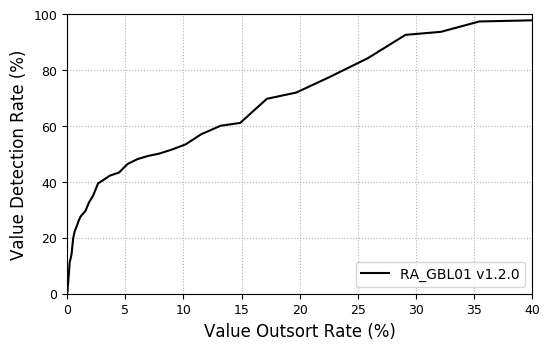

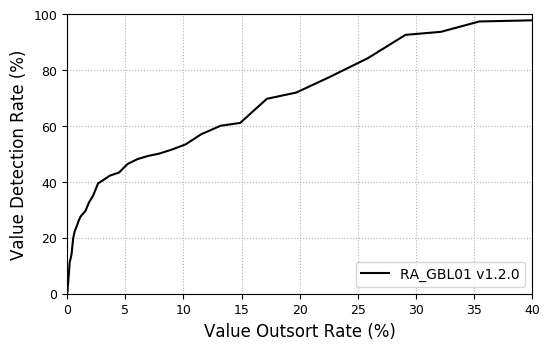

In [62]:
fig = me.add_plot(plotXRange=[0,41,5], show=True)
fig

In [63]:
me.add_table(show=True)

,Score bin,Total Value,Fraud Value,Fraud Rate,Trx Outsort Rate,Trx Detection Rate,TFPR
0,1000,0.00,0.00,nan%,0.00%,0.00%,nan
1,980,"10,549.77","1,845.27",17.49%,0.02%,0.64%,4.72
2,960,"11,353.14","4,967.67",43.76%,0.05%,2.35%,2.21
3,940,"10,712.75","3,182.19",29.70%,0.08%,3.45%,2.26
4,920,"19,109.92","7,630.53",39.93%,0.12%,6.08%,1.93
5,900,"18,461.83","5,545.18",30.04%,0.17%,7.99%,2.03
6,880,"20,542.30","9,071.00",44.16%,0.21%,11.12%,1.81
7,860,"37,203.93","4,599.21",12.36%,0.30%,12.71%,2.47
8,840,"33,763.55","4,483.80",13.28%,0.38%,14.25%,2.91
9,820,"56,049.72","16,131.81",28.78%,0.52%,19.82%,2.79


In [64]:
# spark.stop()

# Testing ModelDist

In [65]:
from Metrics import ModelDist, Metrics
importlib.reload(Metrics)
importlib.reload(ModelDist)

<module 'Metrics.ModelDist' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/ModelDist.py'>

In [66]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [67]:
md = ModelDist.ModelDist(start_date='2018-06-16', 
                               end_date='2018-06-30', 
                               date_interval=1, 
                               date_unit='weeks', 
                               group=['*'],
                               )

In [68]:
md.run(spark)

In [69]:
md.result

,Value,"Week 24, 2018","Week 25, 2018","Week 26, 2018"
0,No Model,6538,4,1
1,RAN_GBL01 v1.0.0,0,1640804,418113
2,RA_GBL01 v1.2.0,2827651,1594593,0


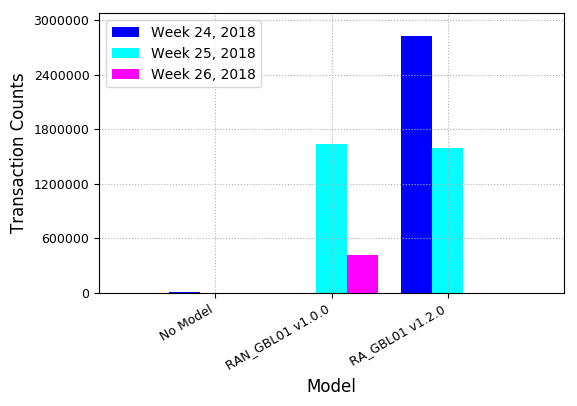

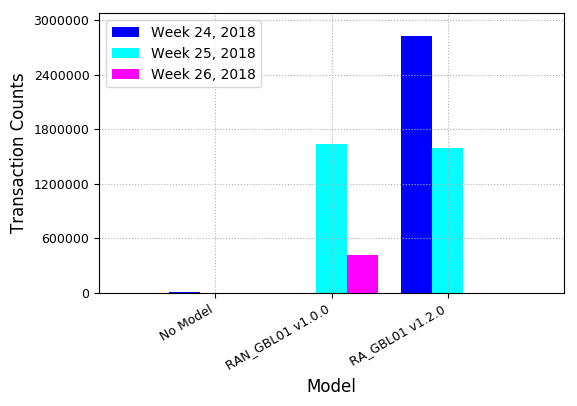

In [70]:
fig = md.add_plot(show=True)
fig

In [71]:
md.add_table(show=True)

,Value,"Week 24, 2018","Week 25, 2018","Week 26, 2018"
0,No Model,"6,538",4,1
1,RAN_GBL01 v1.0.0,0,"1,640,804","418,113"
2,RA_GBL01 v1.2.0,"2,827,651","1,594,593",0


In [72]:
# spark.stop()

# Testing BillingTable

In [73]:
from Metrics import BillingTable, Metrics
importlib.reload(Metrics)
importlib.reload(BillingTable)

<module 'Metrics.BillingTable' from '/dfm1/lijli06/DFM_SPARK/src/Metrics/BillingTable.py'>

In [74]:
# spark = launch_spark(executor_instances=17, executor_cores=5, executor_memory='27g')

In [76]:
bt = BillingTable.BillingTable(start_date='2018-08-23', 
                               end_date='2018-09-01', 
                               group=['/dfm1/lijli06/DFM_SPARK/jobs/*.txt'],
                               )

In [77]:
bt.run(spark)

In [78]:
bt.result.iloc[:,3:]

,RANGEID,BEGINRANGE,Billing Period,Transactions,Active Cards,RA Enabled,RA User Counts,$Auth Transactions
0,19,400283,2018-09,0.0,1,No,0.0,0.0
1,25,401142,2018-09,11.0,146,Yes,42.0,0.0
2,30,401666,2018-09,13.0,386,Yes,92.0,0.0
3,39,402020,2018-09,87.0,2320,Yes,717.0,0.0
4,54,403433,2018-09,0.0,2,Yes,1.0,0.0
5,71,403901,2018-09,0.0,4,Yes,2.0,0.0
6,76,403928,2018-09,1.0,22,Yes,5.0,0.0
7,79,404524,2018-09,0.0,1,Yes,1.0,0.0
8,82,405008,2018-09,1.0,4,Yes,2.0,0.0
9,84,405029,2018-09,0.0,1,No,0.0,0.0


In [79]:
t1, t2 = bt.add_table(show=True)

In [80]:
t1.iloc[:,3:]

,RANGEID,BEGINRANGE,Billing Period,Transactions,Active Cards,RA Enabled,RA User Counts,$Auth Transactions
0,19,400283,2018-09,0,1,No,0,0
1,25,401142,2018-09,11,146,Yes,42,0
2,30,401666,2018-09,13,386,Yes,92,0
3,39,402020,2018-09,87,"2,320",Yes,717,0
4,54,403433,2018-09,0,2,Yes,1,0
5,71,403901,2018-09,0,4,Yes,2,0
6,76,403928,2018-09,1,22,Yes,5,0
7,79,404524,2018-09,0,1,Yes,1,0
8,82,405008,2018-09,1,4,Yes,2,0
9,84,405029,2018-09,0,1,No,0,0


In [83]:
t2.iloc[:,3:]

,Billing Period,Transactions,Active Cards,RA Enabled,RA User Counts,$Auth Transactions
0,2018-09,"1,784","49,173",Yes,"12,560",0
1,2018-09,369,"8,441",Yes,"2,263",0
2,2018-09,"1,440","12,696",Yes,"12,451",0
3,2018-09,312,1,No,0,0
4,2018-09,"1,711","14,227",Yes,"13,940",0
5,2018-09,7,48,Yes,47,0
6,2018-09,274,"1,845",No,0,0
7,2018-09,"6,520","42,396",Yes,"41,829",0
8,2018-09,3,16,No,0,0
9,2018-09,0,7,No,0,0


In [84]:
spark.stop()